In [31]:
from IPython.display import SVG, display
import yaml

In [32]:
#####------------------------------------------#####

In [33]:
class Dict2SVG:
    ##
    def __init__(self, *args, **kwargs):
        pass
        
    def line(self, svg_dict:dict):
        svg_str = "".join([f'{k}="{v}" ' for k, v in svg_dict.items()])
        return f"<line " + svg_str + "/>"

    def circle(self, svg_dict:dict):
        svg_str = "".join([f'{k}="{v}" ' for k, v in svg_dict.items()])
        return f"<circle " + svg_str + "/>"

    def rect(self, svg_dict:dict):
        svg_str = "".join([f'{k}="{v}" ' for k, v in svg_dict.items()])
        return f"<rect " + svg_str + "/>"

    def text(self, input_text, svg_dict:dict):
        svg_str = "".join([f'{k}="{v}" ' for k, v in svg_dict.items()])
        return f"<text " + svg_str + f">{input_text}</text>"

In [34]:
#####------------------------------------------------------------------------#####

In [35]:
canvas = yaml.safe_load(open("quantum.circuit.param.definitions.yaml"))
#canvas['two-point-gate']

In [36]:
class QuantumCircuitDesigner:
    def __init__(self, *args, **kwargs):
        self.N = args[0]
        self.canvas = yaml.safe_load(open("quantum.circuit.param.definitions.yaml"))
        self.D = self.canvas['axis']['y-gap']  # Y Axis Gap
        self.L = self.canvas['axis']['x-gap']  # X Axis Gap
        #Set Origin
        self.x0 = int(self.L/2)
        self.y0 =  self.D
        #Set Canvas Height and Width
        self.H = int(self.D*(self.N  + 1 ))
        self.W = self.L
        # Set canvas background
        self.BG_COLOR = self.canvas['background-color']
        # Define circuit reference matrix/dictionary
        #self.SVG_STRING_DICT = {i: {0: f'<line x1="{x0}" y1="{y1+(i+1)*self.D}" x2="{x0+L}" y2="{y0+(i+1)*self.D}" stroke="black" stroke-width="2"/>'} for i in range(self.N)}
        
        self.SVG_STRING_LIST = list() 
        wire_stroke = self.canvas['wire']['stroke']
        wire_stroke_width = self.canvas['wire']['stroke-width']
        for i in range(self.N):
            x1, y1 = int(self.x0), int(self.y0+ i*self.D)
            x2, y2 = int(self.x0+self.L), int(self.y0+i*self.D)
            wire = f'''<text x="{x1}" y="{y1-10/2}" fill="black" font-size="10" font-weight="bold">q_{i}</text>
                       <line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="{wire_stroke}" stroke-width="{wire_stroke_width}"/>
                       '''
            
            self.SVG_STRING_LIST.append(wire)

        self.W +=self.L
        self.x0+= int(self.L)


    def _wires(self):
        wire_stroke = self.canvas['wire']['stroke']
        wire_stroke_width = self.canvas['wire']['stroke-width']
        lineobj = Dict2SVG()
        for i in range(self.N):
            x1, y1 = int(self.x0), int(self.y0+ i*self.D)
            x2, y2 = int(self.x0+self.L), int(self.y0+i*self.D)
            wire = lineobj.line({'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2, 'stroke': wire_stroke, 'stroke-width':wire_stroke_width})
            self.SVG_STRING_LIST.append(wire)
            
        self.W +=self.L
        ## Do Not Uncomment #self.x0+= int(self.L)
        

    def single_qubit_gate(self, gates:dict):
        """
        TBA
        """
        if not isinstance(gates, dict):
            raise TypeError("input Parameter <<gates>> must be a dictionary")
            
        self._wires()
        box= self.canvas['single-gate']
        box_width, box_height =box['width'], box['height']
        box_label_font, box_label_fill = box['label-font'], box['label-fill']
        stroke, stroke_width, box_fill = box['stroke-width'], box['stroke'], box['fill']
        q_obj = Dict2SVG()
        #####
        self._wires()
        for i, gate in gates.items():
            bx1 = self.x0 + int((self.L-box_width)/2)
            by1 = (i+1)*self.y0 - int(box_width/2)
            tx1 = bx1 + (box_label_font/2)-2
            ty1 = by1 + box_label_font
            ######
            rect_str = q_obj.rect({'x': bx1, 'y': by1, 'width': box_width, 'height': box_height, 
                       'fill': box_fill,  'stroke': stroke, 'stroke-width': stroke_width})
            text_str =q_obj.text(gate, {'x': tx1, 'y': ty1,  'fill':  box_label_fill, 'font-size': box_label_font, 'font-weight': "bold"})
            self.SVG_STRING_LIST.append(rect_str + text_str)
            

        self.x0+= self.L
        self.W+= self.L


    def two_qubit_gate(self, gate_label, source, target):
        if source == target:
            raise Exception("CNOT Gate cannot operate on same/one qubit")
        #####-------------------------------------------------------------------------------------------#####   
        self._wires()
        
        src_anchor = canvas['two-point-gate']['anchor']
        tgt_anchor = canvas['two-point-gate']['target']
                
        anchor_dict = {'r': src_anchor['r'], 'cx':self.x0, 'cy': self.y0 + source * self.D, 
                    'fill': src_anchor['fill'], 'stroke': src_anchor['stroke'], 'stroke-width': src_anchor['stroke-width']}

        line_dict ={'x1': self.x0, 'y1': self.y0 + source*self.D ,
                    'x2': self.x0, 'y2': self.y0 + target*self.D,
                    'stroke': "black", 'stroke-width':2}

        target_dict = {'x': self.x0 - tgt_anchor['label-font']/2, 'y': self.y0 + target*self.D - tgt_anchor['label-font']/2 , 'width': tgt_anchor['width'], 'height': tgt_anchor['height'], 
                       'fill': tgt_anchor['fill'],  'stroke': tgt_anchor['stroke'], 'stroke-width': tgt_anchor['stroke-width']}

        text_dict = {'x': self.x0, 'y': self.y0+ target* self.D,  'fill':  tgt_anchor['label-fill'], 
                     'font-size': tgt_anchor['label-font'], 'font-weight': "bold"}
        #####-------------------------------------------------------------------------------------------#####
        q_obj  = Dict2SVG()
        src_anchor_node = q_obj.circle(anchor_dict)
        line_node =  q_obj.line(line_dict)
        tgt_anchor_node = q_obj.rect(target_dict)
        text_node = q_obj.text(gate_label, text_dict)
        #####-------------------------------------------------------------------------------------------#####
        self.SVG_STRING_LIST.append(src_anchor_node + line_node + tgt_anchor_node + text_node)
        self.x0+= self.L
        self.W+= self.L




    def cnot_gate(self, source:int, target:int):
        if source == target:
            raise Exception("CNOT Gate cannot operate on same/one qubit")
        #####-------------------------------------------------------------------------------------------#####   
        self._wires()
        cx_src = canvas['cnot-gate']['src']
        cx_tgt = canvas['cnot-gate']['tgt']
        cx_txt = canvas['cnot-gate']['text']
        cx_obj  = Dict2SVG()
        src_dict = {'r': cx_src['r'], 'cx':self.x0, 'cy': self.y0 + source * self.D, 
                    'fill': cx_src['fill'], 'stroke':cx_src['stroke'], 'stroke-width':cx_src['stroke-width']}
        
        tgt_dict = {'r': cx_tgt['r'], 'cx':self.x0,'cy': self.y0+  target * self.D , 
                    'fill': cx_tgt['fill'], 'stroke':cx_tgt['stroke'], 'stroke-width': cx_tgt['stroke-width']}
        
        line_dict ={'x1': self.x0, 'y1': self.y0 + source*self.D ,
                    'x2': self.x0, 'y2': self.y0 + target*self.D,
                    'stroke': "black", 'stroke-width':2}

        txt_dict ={'x': self.x0-5, 'y': self.y0+target*self.D,'fill' : cx_txt['fill'],'font-size': cx_txt['font-size']}
        #####-------------------------------------------------------------------------------------------#####
        cx_src_node = cx_obj.circle(src_dict)
        cx_line_node =  cx_obj.line(line_dict)
        cx_tgt_node = cx_obj.circle(tgt_dict)
        cx_txt_node = cx_obj.text("X", txt_dict)
        #####-------------------------------------------------------------------------------------------#####
        if source - target < 0:
            cx_src_node = cx_obj.circle(src_dict)
            cx_line_node =  cx_obj.line(line_dict)
            cx_tgt_node = cx_obj.circle(tgt_dict)
            cx_txt_node = cx_obj.text("X", txt_dict)
            self.SVG_STRING_LIST.append(cx_src_node + cx_line_node + cx_tgt_node + cx_txt_node)
        #####-------------------------------------------------------------------------------------------#####
        if source - target>0:
            cx_src_node = cx_obj.circle(tgt_dict)
            cx_line_node =  cx_obj.line(line_dict)
            cx_tgt_node = cx_obj.circle(src_dict)
            cx_txt_node = cx_obj.text("X", txt_dict)
            self.SVG_STRING_LIST.append(cx_src_node + cx_line_node + cx_tgt_node + cx_txt_node)
            
        self.x0+= self.L
        self.W+= self.L
        


    def cz_gate(self, source, target):
        if source == target:
            raise Exception("CNOT Gate cannot operate on same/one qubit")
        #####-------------------------------------------------------------------------------------------#####   
        self._wires()
        cz_src = canvas['cnot-gate']['src']
        cz_obj  = Dict2SVG()
        cz_src_dict = {'r': cz_src['r'], 'cx':self.x0, 'cy': self.y0 + source * self.D, 
                    'fill': cz_src['fill'], 'stroke':cz_src['stroke'], 'stroke-width':cz_src['stroke-width']}

        line_dict ={'x1': self.x0, 'y1': self.y0 + source*self.D ,
                    'x2': self.x0, 'y2': self.y0 + target*self.D,
                    'stroke': "black", 'stroke-width':2}

        cz_tgt_dict = {'r': cz_src['r'], 'cx':self.x0, 'cy': self.y0 + target * self.D, 
                    'fill': cz_src['fill'], 'stroke':cz_src['stroke'], 'stroke-width':cz_src['stroke-width']}
        #####-------------------------------------------------------------------------------------------#####
        cz_src_node = cz_obj.circle(cz_src_dict)
        cz_line_node =  cz_obj.line(line_dict)
        cz_tgt_node = cz_obj.circle(cz_tgt_dict)
        #####-------------------------------------------------------------------------------------------#####
        self.SVG_STRING_LIST.append(cz_src_node + cz_line_node + cz_tgt_node)
        #####-------------------------------------------------------------------------------------------#####   
        self.x0+= self.L
        self.W+= self.L

    
    def swap_gate(self, source, target):
        """
        TBA
        """
        self._wires()
        XL =10
        ## x1_1 means x1 position of first x
        x1_1, y1_1  = self.x0 - XL/2, self.y0 - XL/2
        x2_1, y2_1 =  self.x0 + XL/2, self.y0 + XL/2
        #####
        x1_2, y1_2 =  self.x0 - XL/2, self.y0 + self.D - XL/2
        x2_2, y2_2 =  self.x0 + XL/2, self.y0 + self.D + XL/2
        #####
        lineObj = Dict2SVG()
        #####
        x11 = lineObj.line({'x1': x1_1,  'y1': y1_1, 'x2': x2_1, 'y2': y2_1, 'stroke':"black", 'stroke-width': "3"})
        x12 = lineObj.line({'x1' :x1_1, 'y1': y2_1,  'x2': x2_1,  'y2': y1_1,  'stroke': "black", 'stroke-width':"3"})
        #####
        conn_line = lineObj.line({'x1': self.x0, 'y1': self.y0*(source+1), 'x2': self.x0, 'y2' : target*(self.y0 +self.D+XL/2), 
                                  'stroke': "black", 'stroke-width': "2"})
        #####
        x21 = lineObj.line({'x1' :x1_2, 'y1': y1_2, 'x2': x2_2,  'y2': y2_2,  'stroke': "black",  'stroke-width': "3"})
        x22 = lineObj.line({'x1': x1_2, 'y1': y2_2,  'x2': x2_2, 'y2': y1_2,  'stroke': "black",  'stroke-width': "3"})
        ####
        self.SVG_STRING_LIST.append(x11 + x12 + conn_line + x21 + x22)
        ####
        self.x0+= self.L
        self.W+= self.L


    def draw(self):
        svg_header = f'''<svg height="{self.H}" width="{self.W}" style="background-color: {self.BG_COLOR};">'''
        self._wires()
        svg_body = "".join(self.SVG_STRING_LIST)
        svg_string = svg_header  + svg_body + "</svg>"
        display(SVG(data=svg_string))


In [37]:
qc = QuantumCircuitDesigner(3)

In [38]:
qc.single_qubit_gate({0:"H"})

In [39]:
qc.cnot_gate(0,1)

In [40]:
#qc.single_qubit_gate({1:"X", 2:"Y"})

In [41]:
#qc.cnot_gate(0,2)

In [42]:
qc.cz_gate(1, 2)

In [43]:
qc.swap_gate(0, 1)

In [44]:
qc.two_qubit_gate("Y", 0, 1)

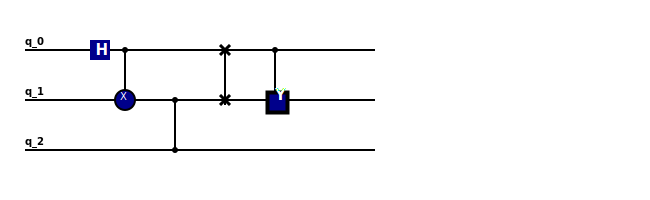

In [45]:
qc.draw()